# <center> Отток клиентов банка

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.io as pio
pio.renderers.default='png'
import plotly.express as px

In [2]:
bank_data = pd.read_csv('churn.csv')
display(bank_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# оценим размерность исходного датасета
bank_data.shape

(10000, 14)

**В данных есть следующие признаки:**
* **RowNumber** — номер строки таблицы;
* **CustomerId** — идентификатор клиента;
* **Surname** — фамилия клиента;
* **CreditScore** — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
* **Geography** — страна клиента (банк международный); 
* **Gender** — пол клиента; 
* **Age** — возраст клиента;  
* **Tenure** — сколько лет клиент пользуется услугами банка; 
* **Balance** — баланс на счетах клиента в банке; 
* **NumOfProducts** — количество услуг банка, которые приобрёл клиент; 
* **HasCrCard** — есть ли у клиента кредитная карта (1 — да, 0 — нет); 
* **IsActiveMember** — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет); 
* **EstimatedSalary** — предполагаемая заработная плата клиента; 
* **Exited** — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент).

Посмотрим внимательнее на структуру данных.

In [4]:
# выведем информацию о столбцах
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Пропусков в данных нет.

Поскольку признак "RowNumber" не имеет какой-либо значимости для нашего исследования, избавимся от него:

In [5]:
bank_data.drop('RowNumber', axis=1, inplace=True)
bank_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Банк обращается к нам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо выяснить основные причины оттока клиентов. Иными словами, нужно **установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.**

## 1. Соотношение ушедших и лояльных клиентов

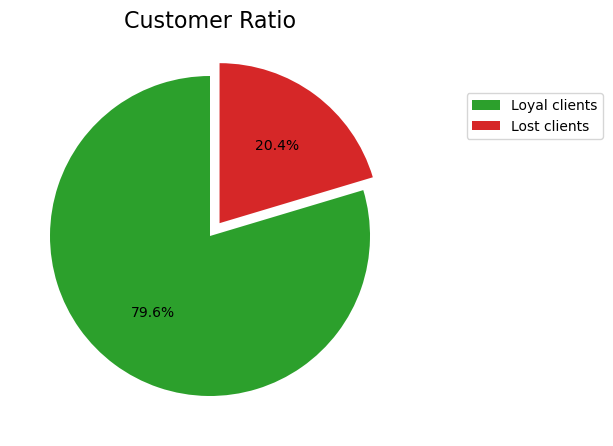

In [6]:
type_of_customers = bank_data['Exited'].value_counts()
clients = ['Loyal clients', 'Lost clients']
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
colors = ['tab:green', 'tab:red']
pie=axes.pie(
    type_of_customers,  
    autopct='%.1f%%',      
    startangle=90, 
    explode=(0, 0.1), 
    colors=colors
);
title = axes.set_title('Customer Ratio', fontsize=16)
axes.legend(clients, loc=5, bbox_to_anchor=(1, 0, 0.5, 1.6))
plt.show(pie)

Большинство клиентов являются действующими, однако **каждый пятый клиент** по каким-то причинам решил отказаться от услуг данного банка. Нашли ли такие клиенты выгодные предложения у конкурентов, предпочли более известный бренд, нужен ли им простой и удобный сервис для совершения покупок, или же их не устраивает текущий уровень кибербезопасности - причин может быть множество. Попробуем выявить взаимосвязи между действующими и ушедшими клиентами, а также какие факторы влияют на степень доверия клиентов банку.

## 2. Распределение баланса пользователей

Посмотрим на распределение баланса пользователей, у которых на счету больше 2 500 долларов:

In [7]:
# фильтруем датасет
vip_clients = bank_data[bank_data['Balance'] > 2500]
vip_clients

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


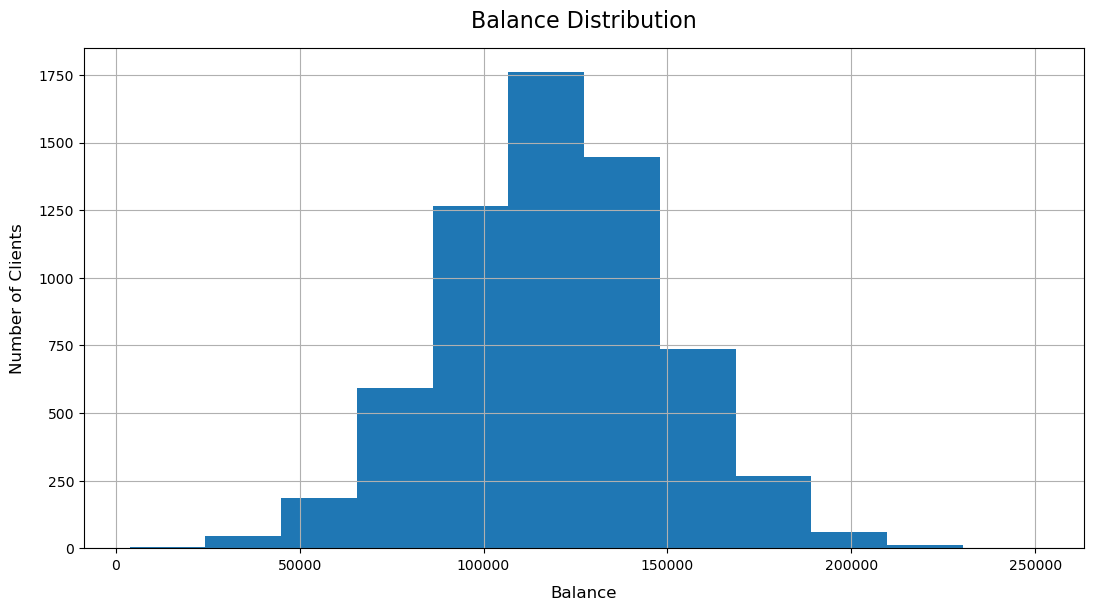

In [8]:
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(vip_clients['Balance'], bins=12)
axes.set_title('Balance Distribution', fontsize=16, pad=15)
axes.set_ylabel('Number of Clients', fontsize=12, labelpad=10)
axes.set_xlabel('Balance', fontsize=12, labelpad=10)
axes.grid();

По построенной гистограмме можно заметить, что у большинства клиентов сумма на балансе составляет от 50 до 200 тыс, наиболее распространены суммы от 110 до 130 тыс. В целом, распределение кажется нормальным, на нем нет видимых аномалий.

## 3. Распределение баланса ушедших и лояльных клиентов

Выясним, как различаются суммы на накопительном счёте ушедших и лояльных клиентов.

Для того, чтобы наша коробчатая диаграмма была более информативная, создадим вспомогательный признак с текущим статусом клиентов банка.

In [9]:
# создаем новый признак
bank_data['Loyalty'] = bank_data['Exited'].apply(lambda x: 'Loyal' if x==0 else 'Lost')
bank_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Lost
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Lost
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Loyal
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Loyal
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Lost
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Lost


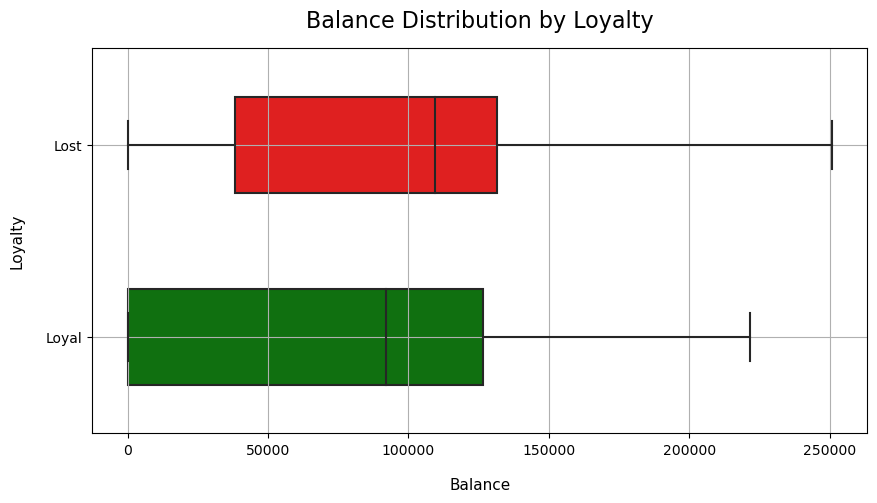

In [10]:
fig = plt.figure(figsize=(10, 5))
colors_by_loyalty = {'Loyal': 'green', 'Lost': 'red'}
boxplot = sns.boxplot(
    data=bank_data, 
    y='Loyalty', 
    x='Balance', 
    orient='h',
    width=0.5,
    palette=colors_by_loyalty
)
boxplot.set_title('Balance Distribution by Loyalty', pad=15, fontsize=16)
boxplot.set_xlabel('Balance', fontsize=11, labelpad=15)
boxplot.set_ylabel('Loyalty', fontsize=11, labelpad=15)
boxplot.grid()

У клиентов, прекративших пользоваться сервисами, медианное значение баланса счетов выше. Из этого можно сделать предположение, что ушедшие клиенты являлись более состоятельными. Возможно, их причина ухода из банка связана с более выгодными предложениями, которые появились на финансовом рынке. 

Кроме того, заметно большое количество лояльных клиентов с нулевым балансом.

## 4. Распределение возраста в разрезе признака оттока

Изучим наших клиентов более детально. Посмотрим на распределение возраста в разрезе признака оттока:

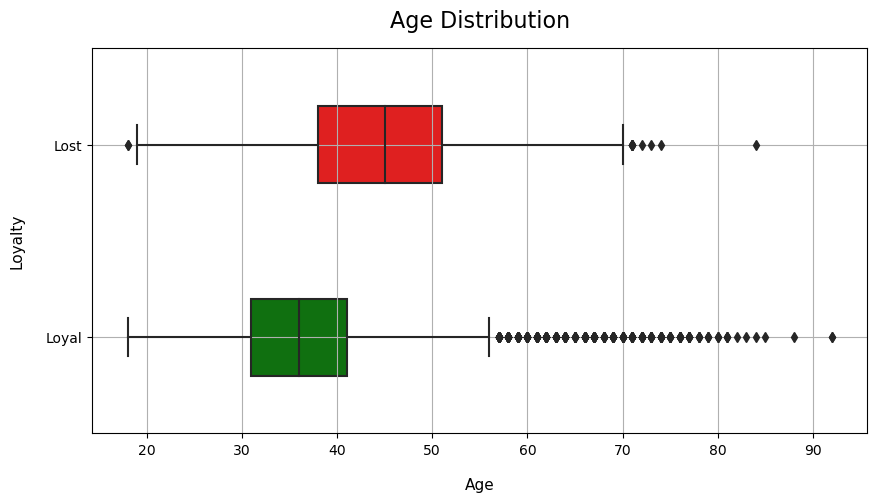

In [11]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=bank_data, 
    y='Loyalty', 
    x='Age', 
    orient='h',
    width=0.4, 
    palette=colors_by_loyalty
)
boxplot.set_title('Age Distribution', pad=15, fontsize=16)
boxplot.set_xlabel('Age', fontsize=11, labelpad=15)
boxplot.set_ylabel('Loyalty', fontsize=11, labelpad=15)
boxplot.grid()

Основная часть **ушедших клиентов - люди 38-50 лет**. Хорошо видна тенденция перехода клиентов из статуса лояльных в статус ушедших. Банку следует обратить особое внимание на потребности клиентов данной возрастной категории.

Что касается **основной части действующих клиентов банка - это люди 30-40 лет**. Так же трудно не заметить большое количество потенциальных выбросов по данной группе клиентов в возрасте от 55 лет и выше в хвосте распределения.

## 5. Зависимость зарплаты от кредитного рейтинга клиентов

Попробуем найти взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Для этого построим диаграмму рассеяния:

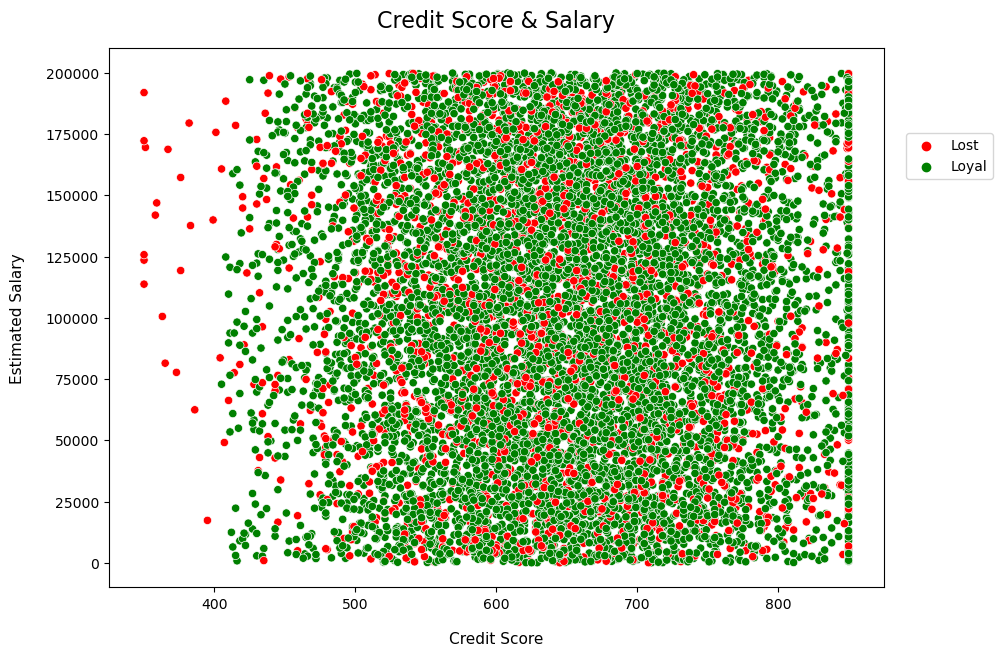

In [12]:
fig = plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(
    data=bank_data, 
    x='CreditScore', 
    y='EstimatedSalary', 
    hue='Loyalty', 
    palette=colors_by_loyalty
)

scatterplot.set_title('Credit Score & Salary', pad=15, fontsize=16)
scatterplot.set_xlabel('Credit Score', fontsize=11, labelpad=15)
scatterplot.set_ylabel('Estimated Salary', fontsize=11, labelpad=15);
scatterplot.legend(loc=5, bbox_to_anchor=(0.7, 0, 0.45, 1.6));

У банка есть достаточно большое количество клиентов с максимальным уровнем рейтинга. Основная часть клиентов имеет средний уровень рейтинга в районе 550 - 750. Все клиенты с рейтингом 400 и ниже покинули банк.

Какой-либо взаимосвязи между кредитным рейтингом и предполагаемой зарплатой клиента **не наблюдается**.

## 6. Пол клиентов в разрезе оттока 

Выясним, кто чаще покидает банк - мужчины или женщины:

In [13]:
# фильтруем датафрейм по признаку оттока
lost_gender = bank_data[bank_data['Exited'] == 1]
by_gender = lost_gender['Gender'].value_counts(normalize=True) * 100

In [14]:
gender_data = bank_data.groupby(['Gender'], as_index=False)['Exited'].mean()
gender_data['Exited'] = gender_data['Exited'] * 100

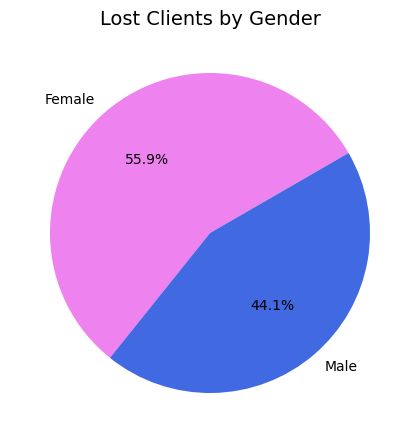

In [15]:
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
colors = ['violet', 'royalblue']
pie=axes.pie(
    by_gender,  
    autopct='%.1f%%',      
    startangle=30, 
    explode=(0, 0), 
    colors=colors, 
    labels=by_gender.index
);
title = axes.set_title('Lost Clients by Gender', fontsize=14)
plt.show(pie)

Женщины перестают пользоваться услугами банка немного чаще, чем мужчины.

## 7. Зависимость оттока клиентов от числа банковских услуг

Теперь посмотрим, как отток клиентов зависит от числа приобретенных банковских услуг:

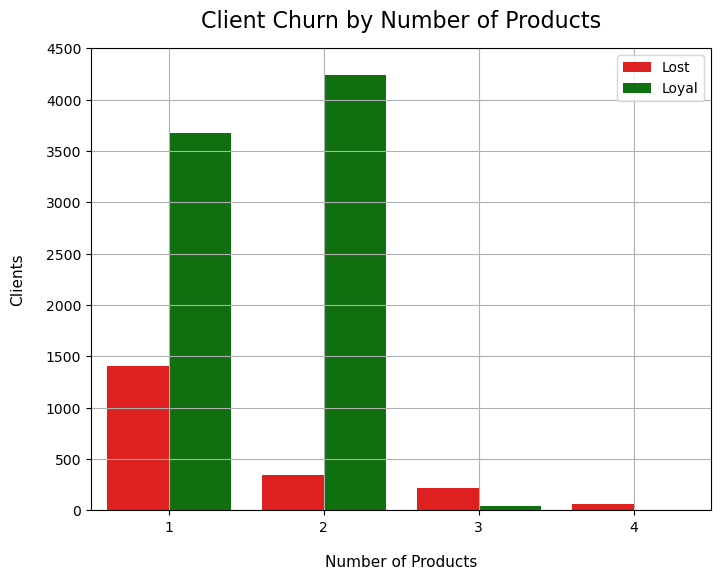

In [16]:
clients_by_products = bank_data.groupby(['NumOfProducts', 'Loyalty'], as_index=False).count()
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=clients_by_products,
    palette=colors_by_loyalty,
    x='NumOfProducts', 
    y='Exited', 
    hue='Loyalty'
)
barplot.set_title('Client Churn by Number of Products', pad=15, fontsize=16)
barplot.set_xlabel('Number of Products', fontsize=11, labelpad=15)
barplot.set_ylabel('Clients', fontsize=11, labelpad=15)
barplot.set_yticks(range(0,5000,500))
barplot.grid()
barplot.legend(loc='upper right');

Клиенты банка, у которых **число продуктов больше двух, составляют абсолютное меньшинство** по сравнению с теми, у кого 1-2 продукта. При этом среди лояльных клиентов нет ни одного человека, у которого было бы сразу 4 продукта - видимо суммарная стоимость обслуживания сразу трех или четырех продуктов начинает негативно отражаться на бюджете клиентов. **Начиная с третьего продукта, начинается существенное падение интереса**. Самый высокий показатель лояльности - среди клиентов с двумя продуктами.

Кроме того, **наибольший отток заметен среди клиентов с одним продуктом**. Банку следует разработать новую программу лояльности для обладателей одного продукта для удержания такой категории клиентов, либо переработать существующий ассортимент, чтобы повысить привлекательность среди пользователей.

## 8. Влияние статуса активного клиента на отток

Всех действующих клиентов банка можно разделить на активных и неактивных пользователей. Посмотрим, как наличие статуса активного клиента влияет на отток из банка:

In [17]:
# совершим преобразование бинарного признака
bank_data.loc[bank_data['IsActiveMember'] == 1, 'Activities'] = 'Active'
bank_data.loc[bank_data['IsActiveMember'] == 0, 'Activities'] = 'Inactive'
display(bank_data.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Activities
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Lost,Active
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal,Active
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Lost,Inactive
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal,Inactive
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal,Active


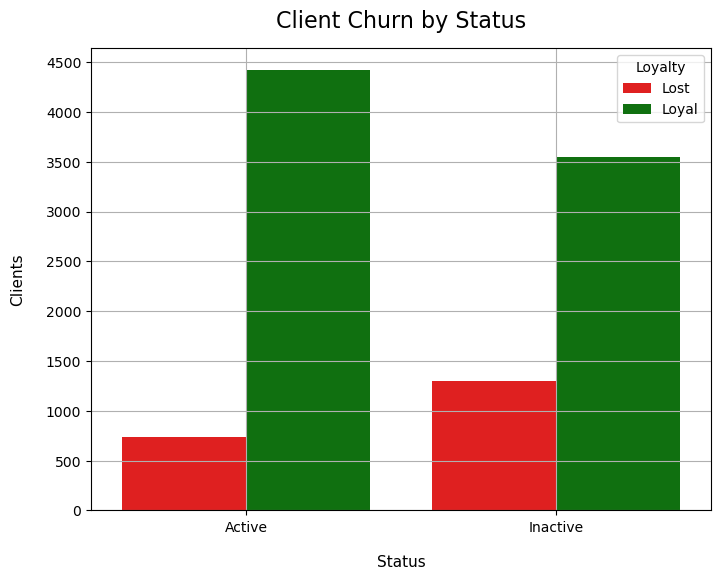

In [18]:
plt.figure(figsize=(8, 6))
activities_df = bank_data.groupby(['Activities', 'Loyalty'], as_index=False).count()
activities_bar = sns.barplot(
    data=activities_df, 
    x='Activities', 
    y='Exited', 
    hue='Loyalty', 
    palette=colors_by_loyalty
)

activities_bar.set_title('Client Churn by Status', pad=15, fontsize=16)
activities_bar.set_xlabel('Status', fontsize=11, labelpad=15)
activities_bar.set_ylabel('Clients', fontsize=11, labelpad=15)
activities_bar.set_yticks(range(0,5000,500))
activities_bar.grid()

Доля неактивных ушедших клиентов в два раза больше, чем активных нелояльных. Демонстрируется прямая зависимость - **клиентов банка перестают устраивать условия по продукту, соответственно их активность падает, после чего такие клиенты покидают банк**. Сконцентрировавшись на потребностях активной нелояльной клиентской базы, банк может попробовать повысить привлекательность своих продуктов и изменить мнение этой категории клиентов. С помощью различных партнерских акций, выгодных условий по ипотеке, потребительским кредитам существует возможность перевести таких клиентов в разряд лояльных и активных.

## 9. Отток клиентов по странам присутствия банка

Исследуемый банк является международной финансовой организацией с присутствием в нескольких странах мира. Выясним, в какой из стран присутствия банка отток клиентов выражен сильнее всего:

In [19]:
churn_by_countries = bank_data.groupby(['Geography'])[['Exited']].mean() * 100
churn_by_countries

,Exited
Geography,
France,16.154767
Germany,32.443204
Spain,16.673395


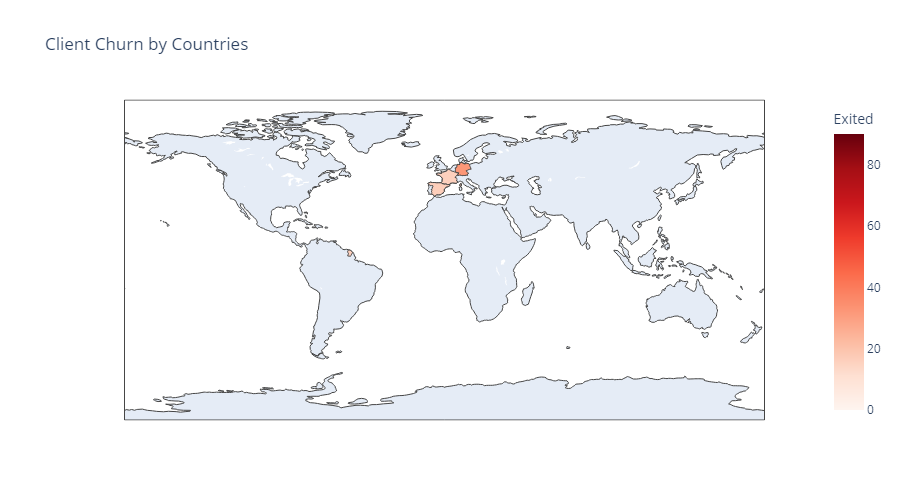

In [20]:
fig = px.choropleth(
    data_frame=churn_by_countries, 
    locations=churn_by_countries.index, 
    locationmode='country names', 
    color='Exited', 
    range_color=[0, 90], 
    color_continuous_scale='Reds', 
    title='Client Churn by Countries', 
    width=900, 
    height=500
)

fig.show()

По картограмме наиболее ярко выражен отток **в Германии**. Следует проверить данную страну на наличие банков - конкурентов.

## 10. Категории клиентов по кредитному рейтингу

Для того, чтобы сегментировать клиентов по кредитному рейтингу, переведем числовой признак CreditScore в категориальный.

In [21]:
# пишем пользовательскую функцию
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [22]:
# преобразуем признак CreditScore
bank_data['CreditScoreCat'] = bank_data['CreditScore'].apply(get_credit_score_cat)
bank_data['CreditScoreCat'] = bank_data['CreditScoreCat'].astype('category')

In [23]:
bank_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Activities,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Lost,Active,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal,Active,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Lost,Inactive,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal,Inactive,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal,Active,Excellent


In [24]:
# создаем сводную таблицу
credit_pivot = bank_data.pivot_table(
    values='Exited', 
    index='CreditScoreCat', 
    columns='Tenure'
)
credit_pivot

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


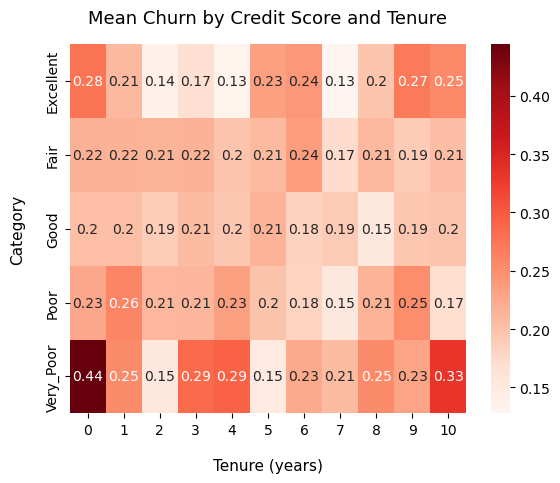

In [25]:
# строим тепловую карту оттока 
heatmap = sns.heatmap(data=credit_pivot, cmap='Reds', annot=True)
heatmap.set_title('Mean Churn by Credit Score and Tenure', pad=15, fontsize=13)
heatmap.set_xlabel('Tenure (years)', fontsize=11, labelpad=15)
heatmap.set_ylabel('Category', fontsize=11, labelpad=15);

Основная категория клиентов, которые **перестали пользоваться услугами банка - люди с минимальным уровнем кредитного рейтинга, которые были клиентами менее года и более 10 лет**. Уровень рейтинга напрямую влияет на доступность сервисов, поэтому люди с низким уровнем дохода не видят смысла оставаться клиентами банка. Это также может негативно повлиять на привлечение новых пользователей, т.к. разочарованные клиенты делятся отрицательным опытом взаимодействия с этим банком и чаще всего склонны оставлять плохие отзывы. 

Среди **клиентов с самым высоким уровнем рейтинга со сроком пользования менее года также наблюдается потеря интереса**. Если такие клиенты принимают решение продолжать сотрудничество, то с увеличением срока сотрудничества **постепенно растет риск ухода из банка**. Наиболее резкий рост заметен после **5-6** и **9-10** лет. 

Относительно стабильную группу клиентов составляют люди с удовлетворительным и хорошим показателем кредитного рейтинга.